In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import zipfile
import pathlib
import os

In [10]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [2]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("101_food_classes_10_percent"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent\test'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\apple_pie'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baby_back_ribs'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baklava'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_carpaccio'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beet_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beignets'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bibimbap'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bread_pudding'.
There are 0 directories and 250 images in '10

There are 0 directories and 75 images in '101_food_classes_10_percent\train\pad_thai'.
There are 0 directories and 75 images in '101_food_classes_10_percent\train\paella'.
There are 0 directories and 75 images in '101_food_classes_10_percent\train\pancakes'.
There are 0 directories and 75 images in '101_food_classes_10_percent\train\panna_cotta'.
There are 0 directories and 75 images in '101_food_classes_10_percent\train\peking_duck'.
There are 0 directories and 75 images in '101_food_classes_10_percent\train\pho'.
There are 0 directories and 75 images in '101_food_classes_10_percent\train\pizza'.
There are 0 directories and 75 images in '101_food_classes_10_percent\train\pork_chop'.
There are 0 directories and 75 images in '101_food_classes_10_percent\train\poutine'.
There are 0 directories and 75 images in '101_food_classes_10_percent\train\prime_rib'.
There are 0 directories and 75 images in '101_food_classes_10_percent\train\pulled_pork_sandwich'.
There are 0 directories and 75 ima

In [4]:
import pathlib

data_dir_train = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir_train.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [5]:
choose = [0, 30, 60]
chosen_classes = class_names[choose]
print("Chosen classes:", chosen_classes)

Chosen classes: ['apple_pie' 'deviled_eggs' 'lobster_bisque']


In [6]:
data_dir_train_set = []
data_dir_test_set = []

for i in range(len(chosen_classes)):
    data_dir_train_set.append(pathlib.Path(f"101_food_classes_10_percent/train/{chosen_classes[i]}"))
    data_dir_test_set.append(pathlib.Path(f"101_food_classes_10_percent/test/{chosen_classes[i]}"))

In [7]:
print('Train paths: ', data_dir_train_set)
print('Test paths: ', data_dir_test_set)

Train paths:  [WindowsPath('101_food_classes_10_percent/train/apple_pie'), WindowsPath('101_food_classes_10_percent/train/deviled_eggs'), WindowsPath('101_food_classes_10_percent/train/lobster_bisque')]
Test paths:  [WindowsPath('101_food_classes_10_percent/test/apple_pie'), WindowsPath('101_food_classes_10_percent/test/deviled_eggs'), WindowsPath('101_food_classes_10_percent/test/lobster_bisque')]


In [8]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

## Example of apple pie

Image shape: (288, 512, 3)


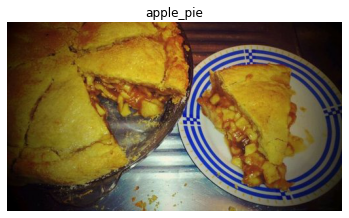

In [9]:
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="apple_pie")

## Example of deviled_eggs

Image shape: (512, 512, 3)


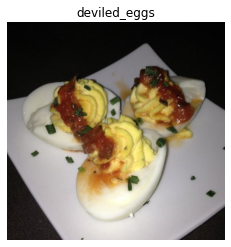

In [10]:
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="deviled_eggs")

## Example of lobster_bisque

Image shape: (512, 512, 3)


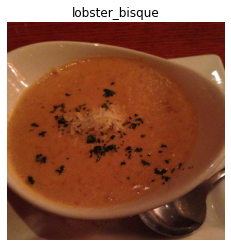

In [11]:
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="lobster_bisque")

In [15]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "food/train/"
test_dir = "food/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="categorical",
                                              seed=42)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [19]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'), 
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

model_1.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
24/24 [==============================] - 21s 828ms/step - loss: 1.0916 - accuracy: 0.3813 - val_loss: 1.0619 - val_accuracy: 0.4844
Epoch 2/10
24/24 [==============================] - 20s 835ms/step - loss: 0.9988 - accuracy: 0.5067 - val_loss: 0.9921 - val_accuracy: 0.4933
Epoch 3/10
24/24 [==============================] - 20s 820ms/step - loss: 0.8940 - accuracy: 0.5573 - val_loss: 0.9230 - val_accuracy: 0.5200
Epoch 4/10
24/24 [==============================] - 19s 774ms/step - loss: 0.8311 - accuracy: 0.5880 - val_loss: 0.9306 - val_accuracy: 0.5689
Epoch 5/10
24/24 [==============================] - 19s 776ms/step - loss: 0.8040 - accuracy: 0.6093 - val_loss: 1.0507 - val_accuracy: 0.4933
Epoch 6/10
24/24 [==============================] - 19s 798ms/step - loss: 0.7642 - accuracy: 0.6493 - val_loss: 0.9381 - val_accuracy: 0.5822
Epoch 7/10
24/24 [==============================] - 20s 816ms/step - loss: 0.7267 - accuracy: 0.6693 - val_loss: 0.9897 - val_accuracy: 0.5556

In [21]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

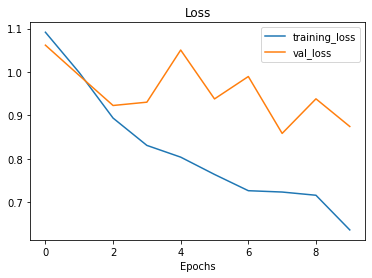

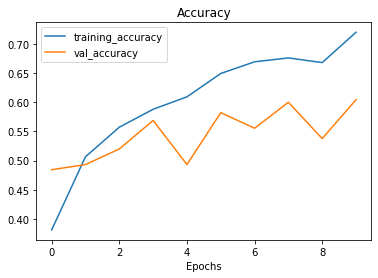

In [23]:
plot_loss_curves(history_1)

In [24]:
predicted = model_1.predict(valid_data).argmax(axis=1)

8/8 [==============================] - 3s 265ms/step


In [25]:
true_y = []
for batch in range(len(valid_data)):
    true_y += list(valid_data[batch][-1].argmax(axis=1))
len(true_y)

225

In [33]:
conf_matrix = pd.DataFrame(confusion_matrix(y_pred=predicted, y_true=true_y), 
                            index=chosen_classes, 
                            columns=chosen_classes)
conf_matrix

,apple_pie,deviled_eggs,lobster_bisque
apple_pie,19,29,27
deviled_eggs,19,34,22
lobster_bisque,17,32,26


### В ході виконання лабораторної роботи було створено модель згорткові нейронні мережі (CNN), яку можна використовувати для комп’ютерного зору, а саме розпізнавати різні страви. 